## The Effect of Handwashing Pre-Post 1847
Analyzing death rate of babies in clinics in the mid-1800s.

### Project Goal
To investigate the number of deaths between 1841 to 1849 through visualization

### Question to study
How did death rate change after the implementation of handwashing before surgeries?

### Solution Workflow
 - Identify question to answer
 - Get and clean data
 - Perform exploratory data analysis (EDA)
 - Share insights

#### Get and clean yearly data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read yearly_deaths_by_clinic data
yc_df = pd.read_csv('yearly_deaths_by_clinic.csv')
yc_df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [6]:
yc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [10]:
#show the number of deaths in each clinic
yc_df.groupby('clinic').deaths.sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

We see that **2 clinics** were studied and **'clinic 1' had about 3x the deaths recorded in clinic 2**

In [15]:
#create a new column showing the death proportions
yc_df['prop_death']=round(yc_df.deaths / yc_df.births,4)
yc_df.head()

,year,births,deaths,clinic,prop_death
0,1841,3036,237,clinic 1,0.0781
1,1842,3287,518,clinic 1,0.1576
2,1843,3060,274,clinic 1,0.0895
3,1844,3157,260,clinic 1,0.0824
4,1845,3492,241,clinic 1,0.0690


#### Yearly data EDA

In [16]:
#filter the two clnics into separate dataframes
clinic1 = yc_df.loc[yc_df.clinic=='clinic 1']
clinic2 = yc_df.loc[yc_df.clinic=='clinic 2']

Text(0, 0.5, 'Deaths')

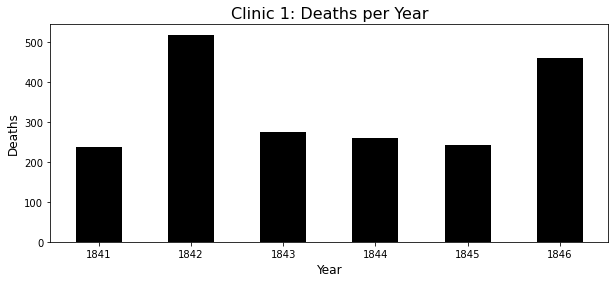

In [18]:
#plot the number of deaths each year for each clinic
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic1.year, clinic1.deaths, width= 0.5, color= "black")
plt.title("Clinic 1: Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Deaths", fontsize=12)

Text(0, 0.5, 'Deaths')

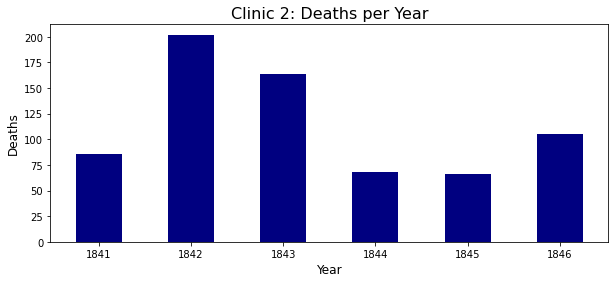

In [23]:
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic2.year, clinic2.deaths, width= 0.5, color= "navy")
plt.title("Clinic 2: Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Deaths", fontsize=12)

**1842** was a tough year with **the most deaths recorded** for clinic 1 and clinic 2,**~500 and ~200 deaths** respectively

Text(0, 0.5, 'Death proportion')

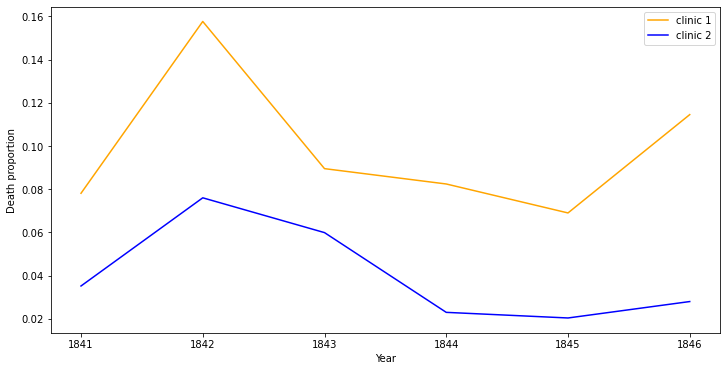

In [29]:
#let us compare the proportion of deaths for both clininc 1 and 2
fig,ax=plt.subplots(figsize=(12,6))
clinic1.plot(x='year',y='prop_death',kind='line',color='orange',label='clinic 1',ax=ax)
clinic2.plot(x='year',y='prop_death',kind='line',color='blue',label='clinic 2',ax=ax)
plt.xlabel('Year')
plt.ylabel('Death proportion')

**Clinic 1 had a death proportion of about an average of 3x more deaths than clinic 2 between 1841 and 1846**

#### Get and clean monthly data

In [30]:
#import data and read
m_df = pd.read_csv('monthly_deaths.csv')
m_df.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [31]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [55]:
#create proportion of deaths column
m_df['prop_death'] = round(m_df.deaths / m_df.births,4)

In [56]:
#convert date column to datetime data type
m_df.date = pd.to_datetime(m_df['date'])

In [57]:
#designate the date when handwashing began --> 1847-06-01
hw_start = '1847-06-01'

#split datafraem into before and after handwashing start
bhw_df = m_df.loc[m_df.date < hw_start]
ahw_df = m_df.loc[m_df.date >= hw_start]

#### EDA

Text(0, 0.5, 'Death proportion')

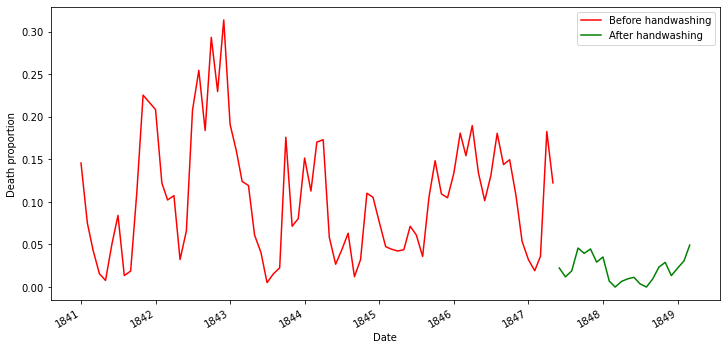

In [60]:
#plot the death proportions for the months before and after handwashing
fig,ax = plt.subplots(figsize=(12,6))
bhw_df.plot(x='date',y='prop_death',color='red',label='Before handwashing', ax=ax)
ahw_df.plot(x='date',y='prop_death',color='green',label='After handwashing', ax=ax)
plt.xlabel('Date')
plt.ylabel('Death proportion')

In [77]:
#find the drop in death prooportions
bhw_mean = bhw_df.prop_death.mean()
ahw_mean = ahw_df.prop_death.mean()
delta_mean = round(ahw_mean-bhw_mean,4)
delta_mean

-0.084

There is a clear differnce between deaths before and after handwashing was implemented in clinics. It shows that there was about **a significant 8% drop in the number of deaths after handwashing was implemented**

### Insights
 - The yearly dataset covered 1841 to 1846 which recorded high numbers of deaths in 1842 and 1846 in both clinics 1 and 2
 - Clinic 1 had about 3x more deaths on average than clinic 2
 - After handwashing was implemented, there was a significant 8% drop in the average death proportions
 
A simple handwashing before surgeries saved a lot of babies being born